<a href="https://colab.research.google.com/github/nokcha0/DawsonAI-Data-Journalism/blob/main/DawsonAI_DataJournalism_Team8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**Essentially this whole section is useless but deleting these dataframes could impact the actual useful ones down the line**

In [ ]:
infl_data = "https://raw.githubusercontent.com/schnozerman/DataJournalism/main/inflation%20interest%20unemployment.csv"
df = pd.read_csv(infl_data)
df

selected_features = ['country', 'year', 'Inflation, consumer prices (annual %)', 'Inflation, GDP deflator (annual %)',
                     'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'iso3c', 'adminregion', 'incomeLevel']
df_raw = df[selected_features]
df_raw.count()
df_raw = df_raw.dropna(subset=['Inflation, consumer prices (annual %)'])
df_raw = df_raw.dropna(subset=['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
df_raw.fillna('Unknown', inplace=True)


getting the 2021 values per each country (useful for 2021 graps)

In [ ]:
df_raw_2021 = df_raw[df_raw['year'] == 2021]
df_raw_2021 = df_raw_2021.groupby('country').mean().reset_index()
df_raw_2021

<ipython-input-5-ca143a8e1667>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_raw_2021 = df_raw_2021.groupby('country').mean().reset_index()


,country,year,"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Albania,2021.0,2.041472,11.819000
1,Algeria,2021.0,7.226063,12.704000
2,Arab World,2021.0,2.683878,11.625344
3,Armenia,2021.0,7.184836,20.896999
4,Australia,2021.0,2.863910,5.112000
...,...,...,...,...
137,Upper middle income,2021.0,4.173077,6.771810
138,Uruguay,2021.0,7.747914,10.447000
139,Vietnam,2021.0,1.834716,2.166000
140,West Bank and Gaza,2021.0,1.237481,24.903000


In [ ]:
df_year_inflation = df_raw.groupby('year')['Inflation, consumer prices (annual %)'].mean().reset_index()
df_year_unemployment = df_raw.groupby('year')['Unemployment, total (% of total labor force) (modeled ILO estimate)'].mean().reset_index()

TypeError: 'Axes' object is not subscriptable

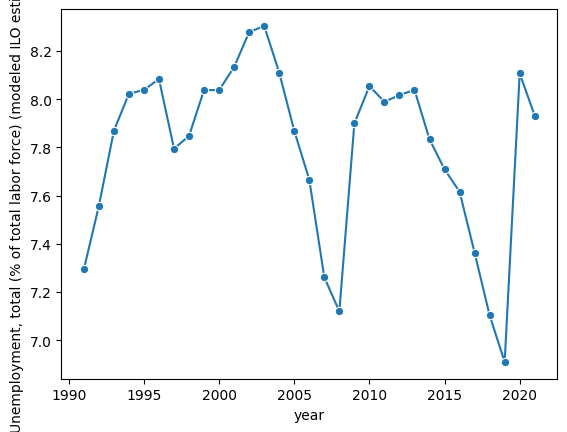

In [ ]:
fig, axes = plt.subplots(1, 1,)

# CO2 Production plot
sns.lineplot(ax=axes, data=df_year_unemployment, x='year', y='Unemployment, total (% of total labor force) (modeled ILO estimate)', marker='o')
axes[0].set(title='Average Global CO2 Production Over Time', xlabel='Year', ylabel='Average annual consumer price inflation')


plt.tight_layout()  # Adjust the layout so that subplots fit into the figure area
plt.show()

In [ ]:
gdp_growth = 'https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/labour_rights.csv'
df_gdp_growth = pd.read_csv(gdp_growth)
desired_sectors = ['label', 'data']
df_gdp_growth = df_gdp_growth[desired_sectors]
df_gdp_growth_cleaned = df_gdp_growth.rename(columns = {'label':'Country', 'data':'gdp_growth'})

In [ ]:
compliance_labour_rights = 'https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/labour_rights.csv'
df_labour = pd.read_csv(compliance_labour_rights)
desired_sectors = ['label', 'data']
df_labour_cleaned = df_labour[desired_sectors]
df_labour_cleaned = df_labour_cleaned.rename(columns={'label':'Country', 'data':'compliance'})

df_labour_cleaned

,Country,compliance
0,Afghanistan,4.76
1,Albania,0.72
2,Algeria,2.07
3,American Samoa,NaN
4,Andorra,NaN
...,...,...
241,Western Sahara,NaN
242,Yemen,1.08
243,Zambia,2.21
244,Zimbabwe,6.00


In [ ]:
df_gdp_labour = pd.merge(
    left= df_gdp_growth_cleaned,
    right= df_labour_cleaned,
    left_on = ['Country'],
    right_on = ['Country'],
)

df_gdp_labour

,Country,gdp_growth,compliance
0,Afghanistan,-22.97,4.76
1,Albania,9.01,0.72
2,Algeria,1.70,2.07
3,American Samoa,NaN,NaN
4,Andorra,6.46,NaN
...,...,...,...
241,Western Sahara,NaN,NaN
242,Yemen,-3.09,1.08
243,Zambia,1.67,2.21
244,Zimbabwe,4.15,6.00


In [ ]:
df_gdp_unemployment = pd.merge(
    left= df_gdp_growth_cleaned,
    right= df_raw_2021,
    left_on = ['Country'],
    right_on = ['country'],

)
df_gdp_unemployment

,Country,gdp_growth,country,year,"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Albania,9.01,Albania,2021.0,2.041472,11.819000
1,Algeria,1.70,Algeria,2021.0,7.226063,12.704000
2,Armenia,6.25,Armenia,2021.0,7.184836,20.896999
3,Australia,2.61,Australia,2021.0,2.863910,5.112000
4,Austria,4.39,Austria,2021.0,2.766667,6.301000
...,...,...,...,...,...,...
94,Sweden,4.09,Sweden,2021.0,2.163197,8.661000
95,Switzerland,3.06,Switzerland,2021.0,0.581814,5.321000
96,Thailand,1.39,Thailand,2021.0,1.230395,1.418000
97,Tunisia,3.46,Tunisia,2021.0,5.706350,16.823999


In [ ]:
df_gdp_unemployment.count()

Country                                                                99
gdp_growth                                                             99
country                                                                99
year                                                                   99
Inflation, consumer prices (annual %)                                  99
Unemployment, total (% of total labor force) (modeled ILO estimate)    99
dtype: int64

In [ ]:
fig = px.scatter(df_gdp_unemployment, x='Unemployment, total (% of total labor force) (modeled ILO estimate)', y='gdp_growth', hover_name='Country',
                 title="Unemployment vs GDP_growth",
                 labels={'gdp_growth': 'gdp_growth', 'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'})
fig.show()

<ipython-input-14-8cf020dbbf24>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



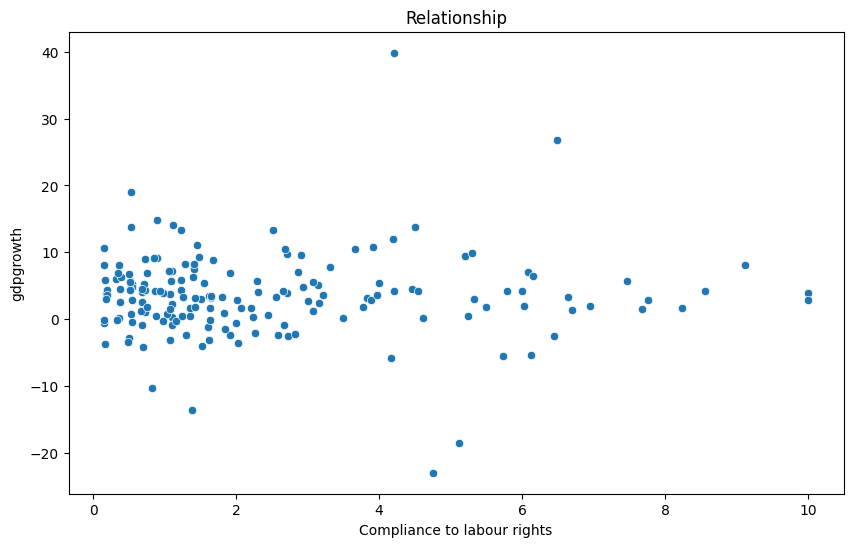

In [ ]:
import plotly.express as px

plt.figure(figsize = (10,6))
sns.scatterplot(x='compliance', y= 'gdp_growth', data=df_gdp_labour, palette='dark2')

plt.title('Relationship')
plt.xlabel('Compliance to labour rights')
plt.ylabel('gdpgrowth')
plt.show();

In [ ]:
fig = px.scatter(df_gdp_labour, x='compliance', y='gdp_growth', color='compliance', hover_name='Country',
                 title="CO2 Production vs Life Expectancy in 2021 by HDI Rank and Category",
                 labels={'compliance': 'compliance', 'gdp_growth': 'gdp_growth'})
fig.show()

In [ ]:
inflation_interest_unemployment = 'https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/informal_employment.csv'
inflation_interest_unemployment_df = pd.read_csv(inflation_interest_unemployment)

In [ ]:
inflation_interest_unemployment_df = inflation_interest_unemployment_df.rename(columns={'label':'country'})
inflation_interest_unemployment_df

,country,variable,data
0,Afghanistan,"Proportion of informal employment, by sector a...",86.43
1,Albania,"Proportion of informal employment, by sector a...",56.69
2,Algeria,"Proportion of informal employment, by sector a...",NaN
3,American Samoa,"Proportion of informal employment, by sector a...",NaN
4,Andorra,"Proportion of informal employment, by sector a...",NaN
...,...,...,...
241,Western Sahara,"Proportion of informal employment, by sector a...",NaN
242,Yemen,"Proportion of informal employment, by sector a...",77.41
243,Zambia,"Proportion of informal employment, by sector a...",85.98
244,Zimbabwe,"Proportion of informal employment, by sector a...",88.24


In [ ]:
labour_rights = 'https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/labour_rights.csv'
labour_rights_df = pd.read_csv(labour_rights)


# Rename 'label' to 'country' in labour_rights_df for consistency
labour_rights_df.rename(columns={'label': 'country'}, inplace=True)

merged_df = pd.merge(labour_rights_df[['country', 'data']],
                     df_raw_2021[['country', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']],
                     how='inner', on='country')

# Renaming columns for clarity
merged_df.columns = ['Country', 'Labour Rights Compliance', 'Unemployment Rate']

# Calculating the correlation
correlation = merged_df['Labour Rights Compliance'].corr(merged_df['Unemployment Rate'])

# Plotting

fig = px.scatter(merged_df, x='Labour Rights Compliance', y='Unemployment Rate', color='Unemployment Rate', hover_name='Country',
                 title="CO2 Production vs Life Expectancy in 2021 by HDI Rank and Category",
                 labels={'Labour Rights Compliance': 'compliance', 'Unemployment Rate': 'Unemployment Rate'})

fig.show()


Informal employment vs labour rights


In [ ]:
df_labour_cleaned

,Country,compliance
0,Afghanistan,4.76
1,Albania,0.72
2,Algeria,2.07
3,American Samoa,NaN
4,Andorra,NaN
...,...,...
241,Western Sahara,NaN
242,Yemen,1.08
243,Zambia,2.21
244,Zimbabwe,6.00


### FROM HERE ON OUT, GRAPHS PRODUCED ARE USEFUL

--2024-03-24 15:29:35--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40906 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine.mplstyle’

rose-pine.mplstyle  100%[===================>]  39.95K  --.-KB/s    in 0.003s  

2024-03-24 15:29:35 (12.9 MB/s) - ‘/tmp/rose-pine.mplstyle’ saved [40906/40906]

--2024-03-24 15:29:36--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respo

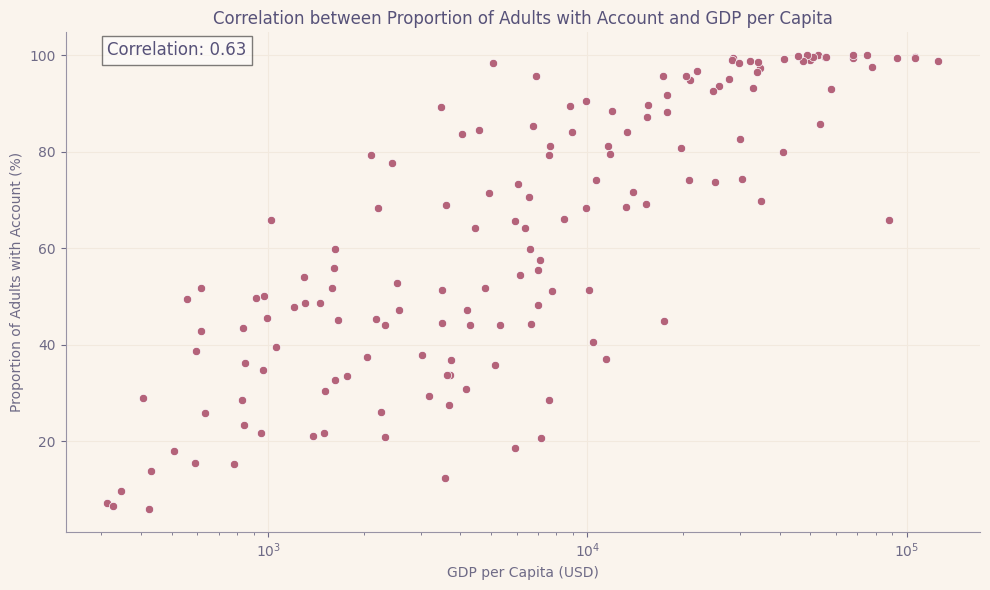

(None, 0.6316654777489099)

In [ ]:

import pandas as pd


banksystem_df = pd.read_csv('https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/bank_system.csv')
gdp_per_capita_df = pd.read_csv('https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/UNdata_Export_20240323_202535839.csv')

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle -P /tmp
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")


banksystem_df.head(), gdp_per_capita_df.head()


banksystem_df.rename(columns={'label': 'Country or Area'}, inplace=True)

merged_df = pd.merge(banksystem_df[['Country or Area', 'data']], gdp_per_capita_df[['Country or Area', 'Value']], on='Country or Area', how='inner')

# Renaming columns for clarity
merged_df.rename(columns={'data': 'Proportion of Adults with Account', 'Value': 'GDP per Capita'}, inplace=True)


merged_df.dropna(inplace=True)

correlation = merged_df['Proportion of Adults with Account'].corr(merged_df['GDP per Capita'])

# Preparing for graphing
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='GDP per Capita', y='Proportion of Adults with Account')
plt.title('Correlation between Proportion of Adults with Account and GDP per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Proportion of Adults with Account (%)')
plt.grid(True)
plt.xscale('log')
# Displaying the correlation coefficient on the plot
plt.text(x=merged_df['GDP per Capita'].min(), y=merged_df['Proportion of Adults with Account'].max(), s=f'Correlation: {correlation:.2f}', fontsize=12,bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show(), correlation

<ipython-input-21-808f28e7fa4b>:17: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



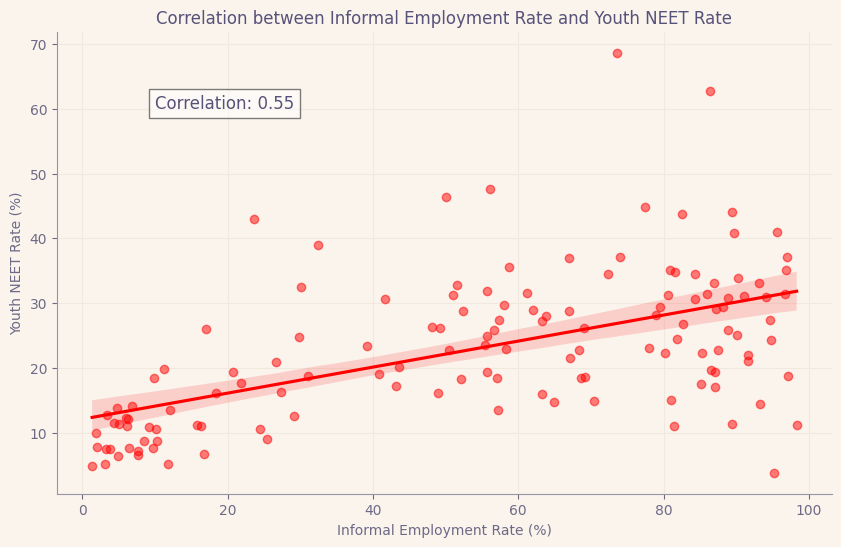

In [ ]:
import pandas as pd

youth_data_path = 'https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/youth_NEET.csv'
informal_employment_path = 'https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/informal_employment.csv'


youth_data = pd.read_csv(youth_data_path)
informal_employment = pd.read_csv(informal_employment_path)

youth_data.head(), informal_employment.head()

youth_data_simplified = youth_data[['label', 'data']].rename(columns={'data': 'youth_neet_rate'})
informal_employment_simplified = informal_employment[['label', 'data']].rename(columns={'data': 'informal_employment_rate'})

merged_data = pd.merge(youth_data_simplified, informal_employment_simplified, on='label', how='inner')

merged_data.head(), merged_data.corr()

cleaned_data = merged_data.dropna(subset=['youth_neet_rate', 'informal_employment_rate'])


correlation_matrix = cleaned_data[['youth_neet_rate', 'informal_employment_rate']].corr()
correlation_coefficient = correlation_matrix.iloc[0, 1]


plt.figure(figsize=(10, 6))
sns.regplot(x='informal_employment_rate', y='youth_neet_rate', data=cleaned_data,
            scatter_kws={'alpha':0.5, 'color': 'red'},
            line_kws={'color': 'red'})
plt.title('Correlation between Informal Employment Rate and Youth NEET Rate')
plt.xlabel('Informal Employment Rate (%)')
plt.ylabel('Youth NEET Rate (%)')
plt.grid(True)

plt.text(10,
         60,
         s=f"Correlation: {correlation_coefficient:.2f}",
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [ ]:
informal_employment_simplified

,label,informal_employment_rate
0,Afghanistan,86.43
1,Albania,56.69
2,Algeria,NaN
3,American Samoa,NaN
4,Andorra,NaN
...,...,...
241,Western Sahara,NaN
242,Yemen,77.41
243,Zambia,85.98
244,Zimbabwe,88.24


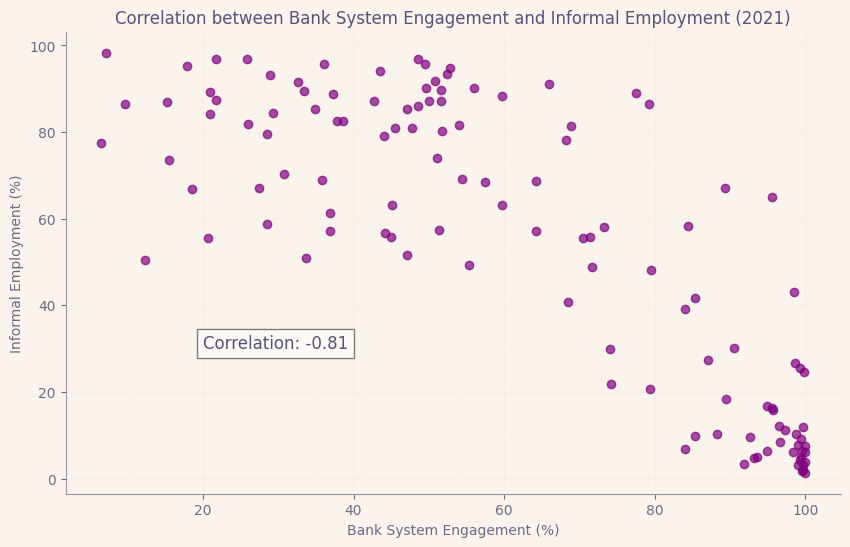

In [ ]:


import pandas as pd

# Load the datasets
bank_system_df = pd.read_csv('https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/bank_system.csv')
informal_employment_df = pd.read_csv('https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/informal_employment.csv')

# Display the first few rows of each dataset to understand their structure
bank_system_df.head(), informal_employment_df.head()

# Merge the two datasets on the country label
merged_df = pd.merge(bank_system_df[['label', 'data']].rename(columns={'data': 'bank_system_percentage'}),
                     informal_employment_df[['label', 'data']].rename(columns={'data': 'informal_employment_percentage'}),
                     on='label')


cleaned_df = merged_df.dropna()

# Compute the correlation
correlation = cleaned_df['bank_system_percentage'].corr(cleaned_df['informal_employment_percentage'])

cleaned_df.head(), correlation

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['bank_system_percentage'], cleaned_df['informal_employment_percentage'], color='purple', alpha=0.7)
plt.title('Correlation between Bank System Engagement and Informal Employment (2021)')
plt.xlabel('Bank System Engagement (%)')
plt.ylabel('Informal Employment (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding the correlation coefficient to the plot
plt.text(20, 30, f'Correlation: {correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

--2024-03-24 15:29:42--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40906 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine.mplstyle.1’

rose-pine.mplstyle. 100%[===================>]  39.95K  --.-KB/s    in 0.003s  

2024-03-24 15:29:42 (11.3 MB/s) - ‘/tmp/rose-pine.mplstyle.1’ saved [40906/40906]

--2024-03-24 15:29:42--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting r

Text(37769.159955997195, 80, 'Correlation: -0.71')

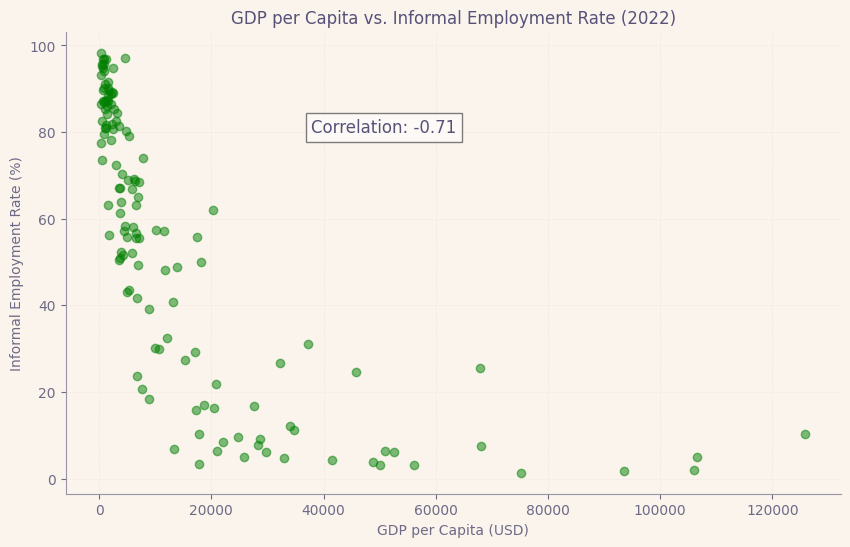

In [ ]:

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle -P /tmp
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")
# Paths to the newly uploaded files
gdp_file_path_new = 'https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/UNdata_Export_20240323_202535839.csv'
informal_employment_file_path_new = 'https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/informal_employment.csv'

# Loading the datasets
gdp_df_new = pd.read_csv(gdp_file_path_new)
informal_employment_df_new = pd.read_csv(informal_employment_file_path_new)

# Renaming columns for consistency and ease of merging
gdp_df_new.rename(columns={'Country or Area': 'country', 'Year': 'year', 'Value': 'GDP_per_capita'}, inplace=True)
informal_employment_df_new.rename(columns={'label': 'country', 'data': 'informal_employment_rate'}, inplace=True)


merged_informal_gdp_df_new = pd.merge(gdp_df_new[['country', 'GDP_per_capita']], informal_employment_df_new[['country', 'informal_employment_rate']], on='country', how='inner')


cleaned_merged_informal_gdp_df_new = merged_informal_gdp_df_new.dropna()



correlation_matrix = cleaned_merged_informal_gdp_df_new[['GDP_per_capita', 'informal_employment_rate']].corr()
correlation_coefficient = correlation_matrix.iloc[0, 1]


plt.figure(figsize=(10, 6))
plt.scatter(cleaned_merged_informal_gdp_df_new['GDP_per_capita'], cleaned_merged_informal_gdp_df_new['informal_employment_rate'], color='green', alpha=0.5)
plt.title('GDP per Capita vs. Informal Employment Rate (2022)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Informal Employment Rate (%)')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Display the correlation coefficient on the plot

plt.text(x=0.3 * cleaned_merged_informal_gdp_df_new['GDP_per_capita'].max(),
         y=80,
         s=f"Correlation: {correlation_coefficient:.2f}",
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))

In [ ]:
cleaned_merged_informal_gdp_df_new

,country,GDP_per_capita,informal_employment_rate
0,Afghanistan,344.649112,86.43
1,Albania,6655.258391,56.69
4,Angola,3183.699796,84.32
7,Argentina,13867.913268,48.95
8,Armenia,7018.113045,49.26
...,...,...,...
196,Venezuela (Bolivarian Republic of),4569.110543,58.34
197,Viet Nam,4163.514300,70.39
198,Yemen,326.651586,77.41
199,Zambia,1455.546876,85.98


In [ ]:
fig = px.scatter(cleaned_merged_informal_gdp_df_new, x='GDP_per_capita', y='informal_employment_rate', hover_name='country',
                 title="GDP per capita vs informal employment rate in 2022",
                 labels={'GDP_per_capita': 'GDP_per_capita', 'informal_employment_rate': 'informal_employment_rate'})
fig.show();

In [ ]:
child_labour_path = 'https://raw.githubusercontent.com/schnozerman/DataJournalism/main/childlabor.csv'
child_labour_df = pd.read_csv(child_labour_path) # downloaded from 2022 un site https://unstats.un.org/UNSDWebsite/undatacommons/sdgs/goals?v=dc%2Ftopic%2Fsdg_8.7.1
child_labour_df

,label,variable,data
0,Afghanistan,Proportion of children engaged in economic act...,13.0
1,Albania,Proportion of children engaged in economic act...,NaN
2,Algeria,Proportion of children engaged in economic act...,2.5
3,American Samoa,Proportion of children engaged in economic act...,NaN
4,Andorra,Proportion of children engaged in economic act...,NaN
...,...,...,...
241,Western Sahara,Proportion of children engaged in economic act...,NaN
242,Yemen,Proportion of children engaged in economic act...,NaN
243,Zambia,Proportion of children engaged in economic act...,23.0
244,Zimbabwe,Proportion of children engaged in economic act...,27.9


In [ ]:
df_child_informal = pd.merge(
    left = child_labour_df,
    right = cleaned_merged_informal_gdp_df_new,
    left_on = ['label'],
    right_on = ['country'],
)

df_child_informal = df_child_informal.rename(columns={'data': '% children doing labour'})

In [ ]:
plt.figure(figsize=(10, 6))

fig = px.scatter(df_child_informal, x='informal_employment_rate', y='% children doing labour', hover_name='label',
                 title="Informal employment rate vs % of children doing labour in 2022",
                 labels={'% of children doing labour' : '% of children doing labour', 'informal_employment_rate': 'informal_employment_rate'})
fig.show();

<Figure size 1000x600 with 0 Axes>

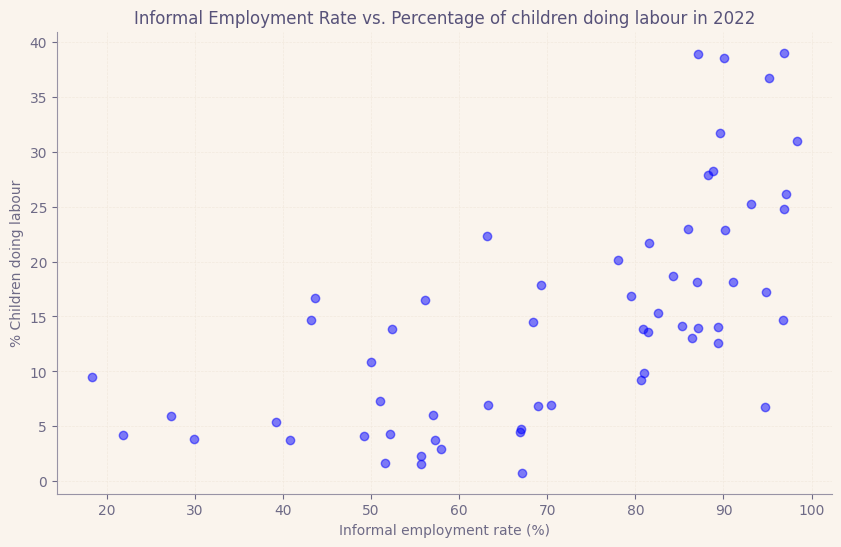

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_child_informal['informal_employment_rate'], df_child_informal['% children doing labour'], color='blue', alpha=0.5)
plt.title('Informal Employment Rate vs. Percentage of children doing labour in 2022')
plt.xlabel('Informal employment rate (%)')
plt.ylabel('% Children doing labour')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

In [ ]:
df_labour_cleaned
cleaned_merged_informal_gdp_df_new

super_merged_labour_and_informal = pd.merge(
    left = df_labour_cleaned,
    right = cleaned_merged_informal_gdp_df_new,
    left_on = ['Country'],
    right_on = ['country'],
)
super_merged_labour_and_informal

,Country,compliance,country,GDP_per_capita,informal_employment_rate
0,Afghanistan,4.76,Afghanistan,344.649112,86.43
1,Albania,0.72,Albania,6655.258391,56.69
2,Angola,2.27,Angola,3183.699796,84.32
3,Argentina,2.71,Argentina,13867.913268,48.95
4,Armenia,1.40,Armenia,7018.113045,49.26
...,...,...,...,...,...
126,Venezuela (Bolivarian Republic of),7.67,Venezuela (Bolivarian Republic of),4569.110543,58.34
127,Viet Nam,8.23,Viet Nam,4163.514300,70.39
128,Yemen,1.08,Yemen,326.651586,77.41
129,Zambia,2.21,Zambia,1455.546876,85.98


In [ ]:
super_merged_labour_and_informal['compliance'] = super_merged_labour_and_informal['compliance'].round()
super_merged_labour_and_informal

,Country,compliance,country,GDP_per_capita,informal_employment_rate
0,Afghanistan,5.0,Afghanistan,344.649112,86.43
1,Albania,1.0,Albania,6655.258391,56.69
2,Angola,2.0,Angola,3183.699796,84.32
3,Argentina,3.0,Argentina,13867.913268,48.95
4,Armenia,1.0,Armenia,7018.113045,49.26
...,...,...,...,...,...
126,Venezuela (Bolivarian Republic of),8.0,Venezuela (Bolivarian Republic of),4569.110543,58.34
127,Viet Nam,8.0,Viet Nam,4163.514300,70.39
128,Yemen,1.0,Yemen,326.651586,77.41
129,Zambia,2.0,Zambia,1455.546876,85.98


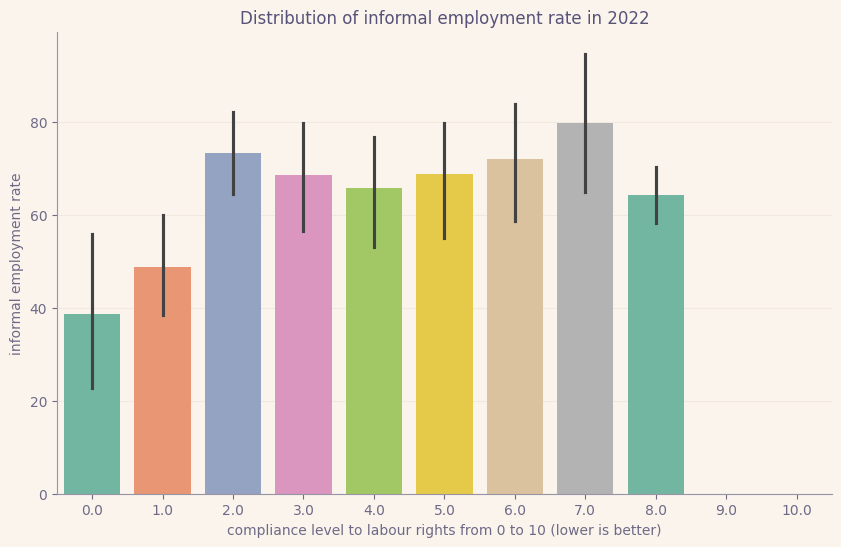

In [ ]:
# CO2 Production Distribution
plt.figure(figsize=(10, 6))
bins = [0.0, 1.0 ,2.0 ,3.0 ,4.0 ,5.0 ,6.0 ,7.0 ,8.0 , 9.0, 10.0 ]

sns.barplot(x='compliance', y='informal_employment_rate',  hue='compliance', data=super_merged_labour_and_informal, order= bins, palette='Set2', legend=False)

plt.title('Distribution of informal employment rate in 2022')
plt.xlabel('compliance level to labour rights from 0 to 10 (lower is better)')
plt.ylabel('informal employment rate')
plt.show();

In [ ]:
path_compliance_informal_5years = 'https://raw.githubusercontent.com/schnozerman/DataJournalism/main/cleaned_merged_dataset.csv'
path_compliance_informal_5years_df = pd.read_csv(path_compliance_informal_5years)

path_compliance_informal_5years_df = path_compliance_informal_5years_df.rename(columns={'label':'Country', 'data_informal_employment':'informal_employment',
                                                                                        'data_exports': 'compliance'})
path_compliance_informal_5years_df['compliance'] = path_compliance_informal_5years_df['compliance'].round()
path_compliance_informal_5years_df_round = path_compliance_informal_5years_df

path_compliance_informal_5years_df = path_compliance_informal_5years_df.dropna(subset=['informal_employment'])
path_compliance_informal_5years_df = path_compliance_informal_5years_df.groupby(['compliance', 'year'])['informal_employment'].mean().reset_index()

In [ ]:
path_compliance_informal_5years_df

,compliance,year,informal_employment
0,0.0,2018,33.048333
1,0.0,2019,18.107273
2,0.0,2020,20.216364
3,0.0,2021,28.846364
4,0.0,2022,37.262222
5,1.0,2018,38.959630
6,1.0,2019,33.965185
7,1.0,2020,32.575600
8,1.0,2021,35.603125
9,1.0,2022,50.176047


In [ ]:
path_compliance_informal_5years_df

,compliance,year,informal_employment
0,0.0,2018,33.048333
1,0.0,2019,18.107273
2,0.0,2020,20.216364
3,0.0,2021,28.846364
4,0.0,2022,37.262222
5,1.0,2018,38.959630
6,1.0,2019,33.965185
7,1.0,2020,32.575600
8,1.0,2021,35.603125
9,1.0,2022,50.176047


In [ ]:
path_compliance_informal_5years_df.to_csv()
compression_opts = dict(method='zip',
                        archive_name='out.csv')
path_compliance_informal_5years_df.to_csv('out.zip', index=False,
          compression=compression_opts)

from pathlib import Path

filepath = Path('folder/subfolder/out.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
path_compliance_informal_5years_df.to_csv(filepath)

In [ ]:
import os
os.makedirs('folder/subfolder', exist_ok=True)
path_compliance_informal_5years_df.to_csv('folder/subfolder/out.csv')

In [ ]:
path_compliance_informal_5years_df_round.to_csv()
compression_opts = dict(method='zip',
                        archive_name='out.csv')
path_compliance_informal_5years_df_round.to_csv('out.zip', index=False,
          compression=compression_opts)

from pathlib import Path

filepath = Path('folder/subfolder/out.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
path_compliance_informal_5years_df_round.to_csv(filepath)

In [ ]:
import os
os.makedirs('folder/subfolder', exist_ok=True)
path_compliance_informal_5years_df.to_csv('folder/subfolder/out2.csv')

In [ ]:
import plotly

animation = px.bar(
    path_compliance_informal_5years_df,
    x = 'compliance', y='informal_employment', color = 'compliance',
    animation_frame= ('year'), animation_group = 'informal_employment',
    range_y = [0,80]


)
fig.update_traces(textposition='middle center',marker={'symbol':"circle-x"}, textfont={'color':'black','family':'Helvetica','size':17},mode="text+markers")



animation.show()
plotly.offline.plot(animation, filename='Bar.html')


'Bar.html'

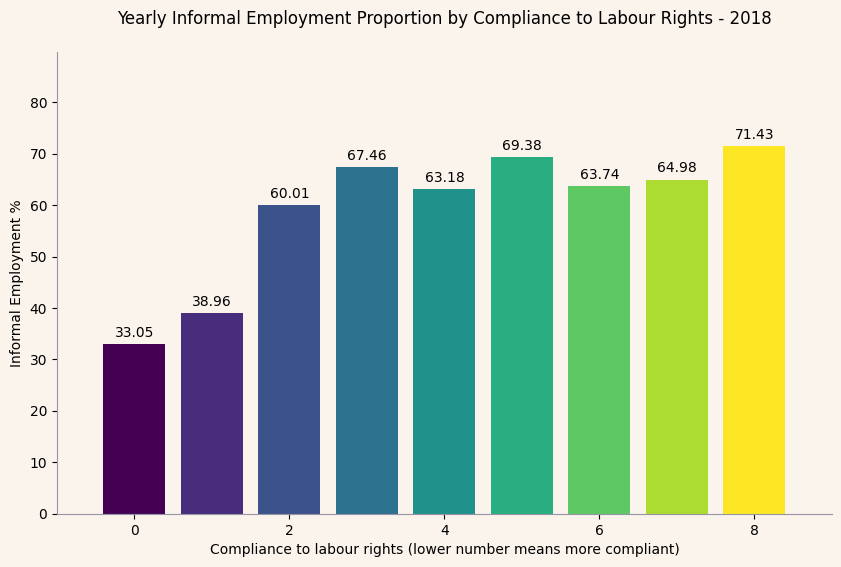

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from matplotlib import cm
import os

# Load the dataset
data_df = path_compliance_informal_5years_df

data_df = data_df.rename(columns={'label':'Country', 'data_informal_employment':'informal_employment',
                                                                                        'data_exports': 'compliance'})

# Apply a custom Matplotlib style
style_path = "/tmp/rose-pine-dawn.mplstyle"  # Update this path to your .mplstyle file location
plt.style.use(style_path)

# Set up the figure for animation
fig, ax = plt.subplots(figsize=(10, 6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(data_df['compliance'].min(), data_df['compliance'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


# Animation function

def animate(year):

    ax.clear()
    ax.set_ylim(0, data_df['informal_employment'].max() + 10)
    ax.set_xlim(data_df['compliance'].min() - 1, data_df['compliance'].max() + 1)
    ax.set_xlabel("Compliance to labour rights (lower number means more compliant)")
    ax.set_ylabel("Informal Employment %")
    ax.set_title(f'Yearly Informal Employment Proportion by Compliance to Labour Rights - {year}', pad=20)

    year_data = data_df[data_df['year'] == year]
    colors = cmap(norm(year_data['compliance']))

    bars = ax.bar(year_data['compliance'], year_data['informal_employment'], color = colors)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Create and save the animation
ani_path = '/content/sample_data/animation.mp4'


frames = np.sort(data_df['year'].unique())
fps = len(frames) / 15  # Adjust FPS based on the desired duration of 15 seconds
ani = animation.FuncAnimation(fig, animate, frames=frames, repeat=False)
ani.save(ani_path, writer='ffmpeg', fps=fps)
#We then turn the mp4 into a gif with a website (https://ezgif.com/maker)

# Reset to default style to avoid affecting future plots
plt.style.use('default')

Map of labour rights respectance (if thats a word)


In [ ]:
df_informal = pd.read_csv('https://raw.githubusercontent.com/schnozerman/DataJournalism/main/informal_formap.csv')
df_informal


import pandas as pd
import plotly.express as px


fig11 = px.choropleth(df_informal, locations='label',
                      locationmode='country names',  # This ensures Plotly recognizes the country names
                      color='data',
                      color_continuous_scale=px.colors.sequential.YlOrRd,
                      title='Informal Employment Rate Worldwide in 2022',
                      labels={'label':''})

fig11.update_layout(
    font=dict(family="Arial, sans-serif",
              size=12, color="RebeccaPurple"),  # Font settings
    geo=dict(showframe=False,  # Remove the frame for a clean look
             showcoastlines=True, showland=True, landcolor="LightGrey"),
    coloraxis_colorbar=dict(title="Informal Employment Rate %",  # Clear title for the color scale
                            tickprefix="", ticksuffix=" ",
                            lenmode="fraction", len=0.75)  # Adjust the length of the color scale bar
)

fig11.show()

In [ ]:
gdp_df_new2 = gdp_df_new[gdp_df_new['year'] == 2022]
gdp_df_new2


,country,year,Item,GDP_per_capita
0,Afghanistan,2022,Gross Domestic Product (GDP),344.649112
1,Albania,2022,Gross Domestic Product (GDP),6655.258391
2,Algeria,2022,Gross Domestic Product (GDP),4273.922183
3,Andorra,2022,Gross Domestic Product (GDP),42293.297081
4,Angola,2022,Gross Domestic Product (GDP),3183.699796
...,...,...,...,...
207,Venezuela (Bolivarian Republic of),2022,Gross Domestic Product (GDP),4569.110543
208,Viet Nam,2022,Gross Domestic Product (GDP),4163.514300
209,Yemen,2022,Gross Domestic Product (GDP),326.651586
210,Zambia,2022,Gross Domestic Product (GDP),1455.546876


In [ ]:



import pandas as pd
import plotly.express as px


fig11 = px.choropleth(gdp_df_new2, locations='country',
                      locationmode='country names',  # This ensures Plotly recognizes the country names
                      color='GDP_per_capita',
                      color_continuous_scale=px.colors.sequential.algae,
                      title='GDP per capita in 2022',
                      labels={'country':''})

fig11.update_layout(
    font=dict(family="Arial, sans-serif",
              size=12, color="RebeccaPurple"),  # Font settings
    geo=dict(showframe=False,  # Remove the frame for a clean look
             showcoastlines=True, showland=True, landcolor="LightGrey"),
    coloraxis_colorbar=dict(title="GDP per capita",  # Clear title for the color scale
                            tickprefix="", ticksuffix=" ",
                            lenmode="fraction", len=0.75)  # Adjust the length of the color scale bar
)

fig11.show()

Joon - informal Employment



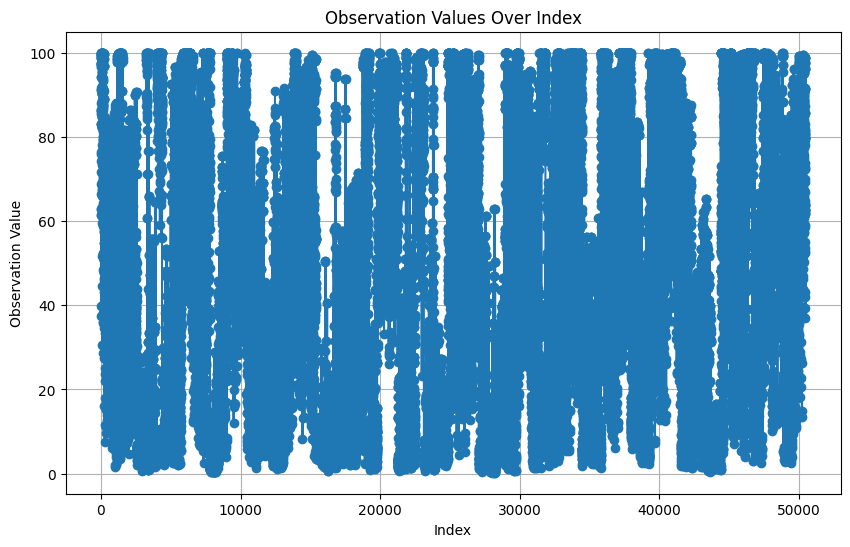

In [ ]:
url = "https://raw.githubusercontent.com/nokcha0/DawsonAI-Data-Journalism/main/CSV%20Files/SDG_0831_SEX_ECO_RT_A.csv"
data = pd.read_csv(url)

data
plt.figure(figsize=(10, 6))

plt.plot(data.index, data['obs_value'], marker='o', linestyle='-')

plt.title('Observation Values Over Index')
plt.xlabel('Index')  # Label for the x-axis
plt.ylabel('Observation Value')  # Label for the y-axis
plt.grid(True)  # Show grid
plt.show()